# Used Car Price Prediction and Web Deployment

### Data Source: Kaggle

Introduction

CarStock is a used car dealer company that wants to create a web app to help customers know the price value of their used cars before selling to them. They have found out that customers, knowing the value of their cars before sales help build customer trust and transparency. 
Dataset of the past transaction and what the companyfor any used car purchases are given in other to make this used car price prediction and app deployment possible.

Objective

Create a model that predict car price

Create a web app to deploy this model


## Importing Libraries

In [1]:
# Data Structure
import pandas as pd
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor


# Others
import warnings
warnings.filterwarnings("ignore")

## Loading The Dataset

In [2]:
df =pd.read_csv(r"C:\Users\Henry Oguns\Desktop\Data Science Portfolio\datasets\used_cars.csv")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [3]:
df.shape

(4009, 12)

Dataset has 4,009 observations and 12 features

In [4]:
# Checking the data types in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [5]:
# Dropping columns that are not necessarilly needed

df = df.drop(['engine','ext_col', 'int_col', 'clean_title'], axis =1)
df.head()

,brand,model,model_year,milage,fuel_type,transmission,accident,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,6-Speed A/T,At least 1 accident or damage reported,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,8-Speed Automatic,At least 1 accident or damage reported,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,Automatic,None reported,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,7-Speed A/T,None reported,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,8-Speed Automatic,None reported,"$34,999"


In [6]:
# Chcecking for Null values in the dataset

df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
transmission      0
accident        113
price             0
dtype: int64

In [7]:
# Dropping the null values from the dataset since we still have enough obersations to build th model

df = df.dropna()
df.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
transmission    0
accident        0
price           0
dtype: int64

In [8]:
df.duplicated().sum()

0

The dataset contanins  283 Null and 0 Duplicates Values

# Data Cleaning

In [9]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,accident,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,6-Speed A/T,At least 1 accident or damage reported,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,8-Speed Automatic,At least 1 accident or damage reported,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,Automatic,None reported,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,7-Speed A/T,None reported,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,8-Speed Automatic,None reported,"$34,999"


In [10]:
# Renaming the milage column

df.rename(columns = {'milage':'mileage'}, inplace = True)

In [11]:
# Replacing string values in the mileage columns with space

df.mileage = df.mileage.str.replace(',', '')
df.mileage = df.mileage.str.replace('mi.', '')

In [12]:
# Changing the data type of the mileage column

df.mileage = df.mileage.astype(str).astype(int)

In [13]:
# Replacing string value and changing the data type of price column

df.price = df.price.str.replace('$', '')
df.price = df.price.str.replace(',', '')
df.price = df.price.astype(int)

In [14]:
# Understanging the unique string values inthe transmission column

df.transmission.value_counts()

transmission
A/T                                                                 939
8-Speed A/T                                                         391
Transmission w/Dual Shift Mode                                      389
6-Speed A/T                                                         354
6-Speed M/T                                                         238
Automatic                                                           219
7-Speed A/T                                                         201
8-Speed Automatic                                                   168
10-Speed A/T                                                        115
5-Speed A/T                                                          84
9-Speed A/T                                                          73
4-Speed A/T                                                          72
6-Speed Automatic                                                    65
CVT Transmission                                   

In [15]:
# Cleaning the column of rows '–' and 'F'

df = df[~(df.transmission =='–')]
df = df[~(df.transmission =='F')]
df.transmission.value_counts()

transmission
A/T                                                                 939
8-Speed A/T                                                         391
Transmission w/Dual Shift Mode                                      389
6-Speed A/T                                                         354
6-Speed M/T                                                         238
Automatic                                                           219
7-Speed A/T                                                         201
8-Speed Automatic                                                   168
10-Speed A/T                                                        115
5-Speed A/T                                                          84
9-Speed A/T                                                          73
4-Speed A/T                                                          72
6-Speed Automatic                                                    65
CVT Transmission                                   

In [16]:
df.fuel_type.value_counts()

fuel_type
Gasoline          3214
Hybrid             190
E85 Flex Fuel      133
Diesel             110
–                   42
Plug-In Hybrid      33
not supported        2
Name: count, dtype: int64

In [17]:
# Cleaning the fuel column from rows with '–' values

df = df[~(df.fuel_type =='–')]
df.fuel_type.value_counts()

fuel_type
Gasoline          3214
Hybrid             190
E85 Flex Fuel      133
Diesel             110
Plug-In Hybrid      33
not supported        2
Name: count, dtype: int64

# Exploratory Data Analysis

<Axes: ylabel='price'>

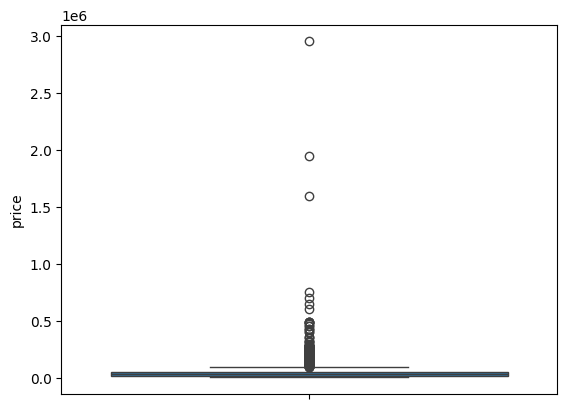

In [18]:
# Checking the value range in the price columns

sns.boxplot(df.price)

In [19]:
sorted(df.price, reverse = True)

[2954083,
 1950995,
 1599000,
 749950,
 695000,
 649999,
 599000,
 491836,
 489995,
 489000,
 488880,
 479995,
 469900,
 449995,
 449991,
 429998,
 425000,
 417500,
 399950,
 399900,
 359991,
 359991,
 349950,
 324995,
 319900,
 315000,
 314900,
 299000,
 289991,
 288900,
 279991,
 279950,
 279950,
 279950,
 279900,
 279000,
 275000,
 275000,
 274900,
 272950,
 269991,
 267950,
 259991,
 259500,
 259000,
 257000,
 254900,
 250000,
 243900,
 240000,
 239995,
 239991,
 238900,
 234900,
 234000,
 229900,
 229900,
 229000,
 229000,
 226000,
 220000,
 217950,
 215000,
 215000,
 210000,
 210000,
 209995,
 209991,
 209900,
 209000,
 204900,
 200000,
 199998,
 199995,
 199991,
 197750,
 197499,
 195000,
 194965,
 193063,
 188900,
 188500,
 187900,
 185950,
 185500,
 185000,
 184606,
 179900,
 179900,
 179900,
 179000,
 175000,
 175000,
 175000,
 174900,
 173995,
 172900,
 172000,
 171900,
 169000,
 166900,
 165000,
 164725,
 162500,
 159998,
 159500,
 159000,
 157500,
 156900,
 154900,
 150000

In [20]:
# Sorting the dataset using the price column.

df.sort_values('price', ascending = False).head()

,brand,model,model_year,mileage,fuel_type,transmission,accident,price
693,Maserati,Quattroporte Base,2005,32000,Gasoline,Transmission w/Dual Shift Mode,At least 1 accident or damage reported,2954083
229,Bugatti,Veyron 16.4 Grand Sport,2011,6330,Gasoline,7-Speed Automatic with Auto-Shift,None reported,1950995
3046,Porsche,Carrera GT Base,2005,4400,Gasoline,6-Speed M/T,None reported,1599000
1356,Lamborghini,Aventador SVJ Base,2021,6987,Gasoline,7-Speed,None reported,749950
624,Rolls-Royce,Cullinan,2022,398,Gasoline,8-Speed Automatic,None reported,695000


Thinking that the prices above 1,000,000 of the cars would be an outlier, turns out that the cars worth the amounts listed on as.

In [21]:
# List of cars under the model years of year 2000

df_90s = df[df.model_year<=1999]
df_90s

,brand,model,model_year,mileage,fuel_type,transmission,accident,price
163,Toyota,Land Cruiser Base,1997,213000,Gasoline,4-Speed A/T,None reported,26500
167,Lexus,LX 470 Base,1999,82000,Gasoline,A/T,None reported,25000
387,Acura,Integra LS,1998,120000,Gasoline,4-Speed A/T,At least 1 accident or damage reported,5500
437,Mazda,MX-5 Miata Base,1999,96680,Gasoline,5-Speed M/T,At least 1 accident or damage reported,12900
594,Chevrolet,Corvette Base,1998,7666,Gasoline,4-Speed A/T,None reported,39500
626,Pontiac,Firebird Base,1999,158000,Gasoline,4-Speed A/T,At least 1 accident or damage reported,2500
685,GMC,Suburban 2500,1996,95000,Gasoline,4-Speed A/T,None reported,25000
883,BMW,M3 Base,1999,184700,Gasoline,5-Speed M/T,None reported,36950
993,Ford,Mustang Base,1998,63900,Gasoline,A/T,None reported,10300
1232,Buick,Roadmaster Estate,1996,119500,Gasoline,4-Speed A/T,At least 1 accident or damage reported,16999


In [22]:
# whats the highest priced car model before and after year 2000
# 90s used cars

df_90s.sort_values('price', ascending = False).head(1)

,brand,model,model_year,mileage,fuel_type,transmission,accident,price
594,Chevrolet,Corvette Base,1998,7666,Gasoline,4-Speed A/T,None reported,39500


In [23]:
# 2000s used cars

df_2000s = df[df.model_year>=2000]
df_2000s.sort_values('price', ascending = False).head(1)

,brand,model,model_year,mileage,fuel_type,transmission,accident,price
693,Maserati,Quattroporte Base,2005,32000,Gasoline,Transmission w/Dual Shift Mode,At least 1 accident or damage reported,2954083


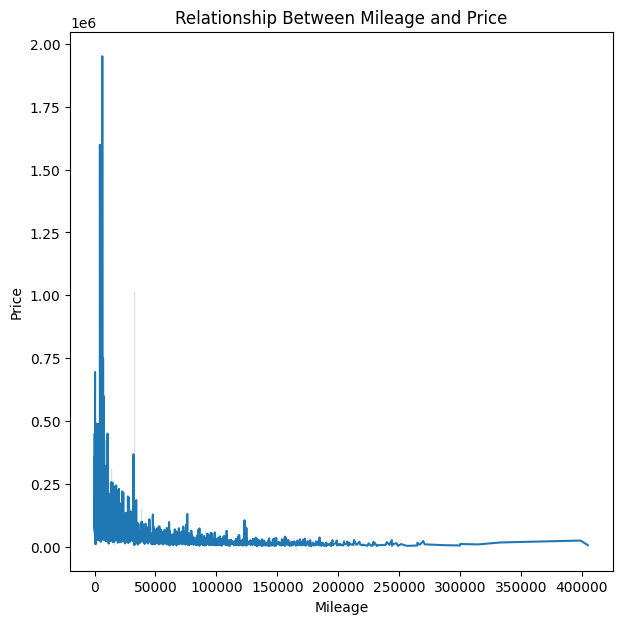

In [24]:
# The relationship between Mileage and Price

plt.figure(figsize = (7,7))
sns.lineplot(x=df.mileage, y = df.price)
plt.title('Relationship Between Mileage and Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

Its important to know the mileage already ran by a car is an importance factor to look at when buying a used car.  It gives you the possible amount of year that car can be used of again.

In [25]:
# Number of cars with less mileage ie mileage under 50,000 miles

df.less_mileage = df[df.mileage<=50000]
len(df.less_mileage)

1708

In [26]:
# Number of cars with more mileage ie mileage over 50,000 miles

df.more_mileage = df[df.mileage>50000]
len(df.more_mileage)

1974

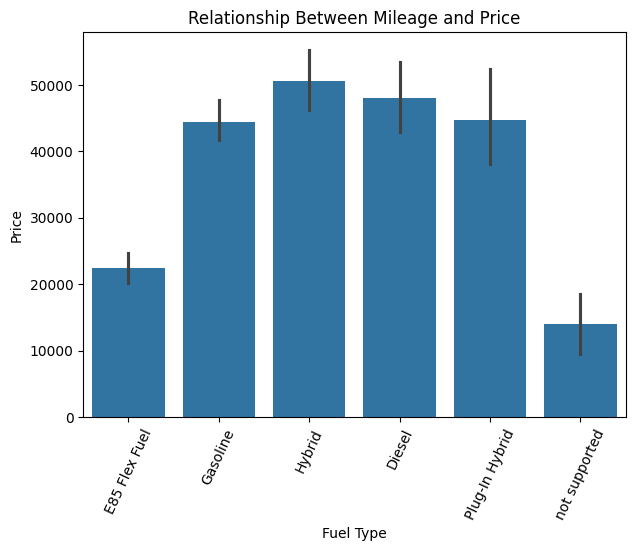

In [27]:
# The relationship between Fuel Type and Price

plt.figure(figsize = (7,5))
sns.barplot(x=df.fuel_type, y = df.price)
plt.title('Relationship Between Mileage and Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation = 65)
plt.show()

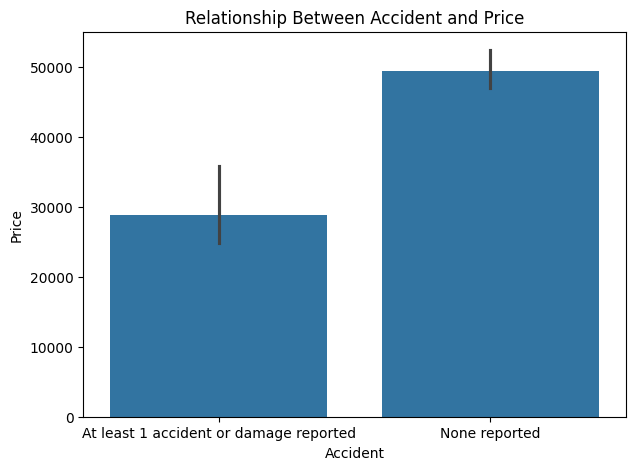

In [28]:
# The relationship between Accident and Price

plt.figure(figsize = (7,5))
sns.barplot(x=df.accident, y = df.price)
plt.title('Relationship Between Accident and Price')
plt.xlabel('Accident')
plt.ylabel('Price')
plt.show()

In [29]:
# Sum of the prices of used cars based on their transmission systems

df.groupby('transmission')['price'].mean().sort_values(ascending = False).head(10)

transmission
7-Speed                              749950.000000
8-SPEED A/T                          289991.000000
7-Speed Automatic with Auto-Shift    259450.291667
Automatic, 8-Spd Dual-Clutch         238900.000000
Manual                               220748.000000
7-Speed DCT Automatic                215000.000000
7-Speed Manual                       211949.500000
8-Speed Automatic with Auto-Shift    183127.555556
6-Speed Manual                       151291.428571
9-Speed Automatic with Auto-Shift    143900.000000
Name: price, dtype: float64

In [30]:
# Rating for 5 most common cars brands in used car

df.brand.value_counts(ascending = False).head()

brand
BMW              362
Ford             355
Mercedes-Benz    305
Chevrolet        277
Toyota           192
Name: count, dtype: int64

In [31]:
df = df.drop('model', axis = 1)

In [32]:
# Categorizing Transmission colunm to ease up our web deploment process

In [33]:
trans_stats = df.groupby('transmission')['transmission'].agg('count').sort_values(ascending = False)
trans_stats_less_than_24 = trans_stats[trans_stats<=24]
df.transmission = df.transmission.apply(lambda x: 'others' if x in trans_stats_less_than_24 else x)
df.transmission.value_counts()

transmission
A/T                               917
8-Speed A/T                       390
Transmission w/Dual Shift Mode    388
6-Speed A/T                       354
6-Speed M/T                       233
Automatic                         219
7-Speed A/T                       201
8-Speed Automatic                 168
others                            123
10-Speed A/T                      115
5-Speed A/T                        83
9-Speed A/T                        71
4-Speed A/T                        68
6-Speed Automatic                  65
CVT Transmission                   62
10-Speed Automatic                 54
5-Speed M/T                        51
9-Speed Automatic                  46
M/T                                38
Automatic CVT                      36
Name: count, dtype: int64

# Feature Engineering

In [34]:
df.head()

,brand,model_year,mileage,fuel_type,transmission,accident,price
0,Ford,2013,51000,E85 Flex Fuel,6-Speed A/T,At least 1 accident or damage reported,10300
1,Hyundai,2021,34742,Gasoline,8-Speed Automatic,At least 1 accident or damage reported,38005
2,Lexus,2022,22372,Gasoline,Automatic,None reported,54598
3,INFINITI,2015,88900,Hybrid,7-Speed A/T,None reported,15500
4,Audi,2021,9835,Gasoline,8-Speed Automatic,None reported,34999


In [35]:
# Encoding all the categorical columns in the dataset

In [36]:
le_brand = LabelEncoder()
df['brand'] = le_brand.fit_transform(df['brand'])

In [37]:
le_fuel_type = LabelEncoder()
df['fuel_type'] = le_fuel_type.fit_transform(df['fuel_type'])

In [38]:
le_transmission = LabelEncoder()
df['transmission'] = le_transmission.fit_transform(df['transmission'])

In [39]:
le_accident = LabelEncoder()
df['accident'] = le_accident.fit_transform(df['accident'])

In [40]:
df.head()

,brand,model_year,mileage,fuel_type,transmission,accident,price
0,14,2013,51000,1,5,0,10300
1,19,2021,34742,2,10,0,38005
2,26,2022,22372,2,14,1,54598
3,20,2015,88900,3,8,1,15500
4,3,2021,9835,2,10,1,34999


In [41]:
# Understanding the overall statistic of the dataset

df.describe()

,brand,model_year,mileage,fuel_type,transmission,accident,price
count,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3.682000e+03
mean,21.801195,2015.457089,66554.180880,1.975285,10.605921,0.737371,4.406047e+04
std,14.537911,5.832483,52508.367403,0.497413,4.938062,0.440122,8.093865e+04
min,0.000000,1996.000000,100.000000,0.000000,0.000000,0.000000,2.000000e+03
25%,9.000000,2012.000000,24500.000000,2.000000,7.000000,0.000000,1.699500e+04
50%,20.000000,2017.000000,55000.000000,2.000000,11.000000,1.000000,3.000000e+04
75%,34.000000,2020.000000,96000.000000,2.000000,13.000000,1.000000,4.878575e+04
max,51.000000,2024.000000,405000.000000,5.000000,19.000000,1.000000,2.954083e+06


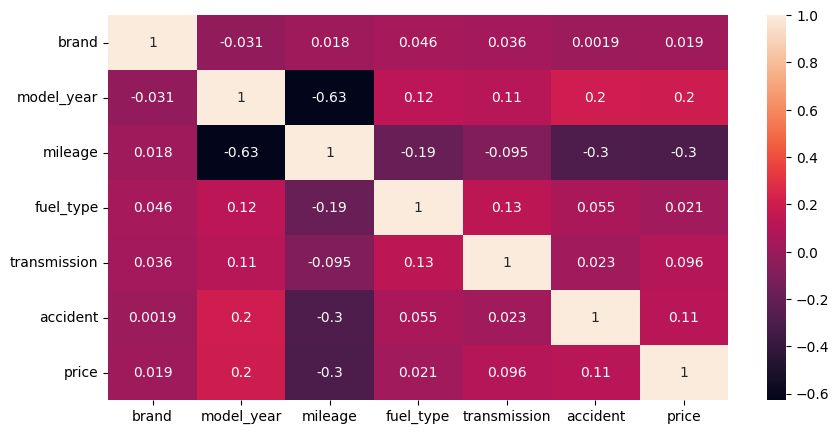

In [42]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

There is a correlation between Price with Model year, Accident, Fuel type and transmission

In [43]:
df.columns

Index(['brand', 'model_year', 'mileage', 'fuel_type', 'transmission',
       'accident', 'price'],
      dtype='object')

In [44]:
X = df.drop(['price'], axis = 1).values
y = df['price'].values

In [45]:
X

array([[   14,  2013, 51000,     1,     5,     0],
       [   19,  2021, 34742,     2,    10,     0],
       [   26,  2022, 22372,     2,    14,     1],
       ...,
       [    3,  2022, 10900,     2,    18,     1],
       [   14,  2020, 33000,     2,    13,     1],
       [    4,  2020, 43000,     2,    13,     0]], dtype=int64)

# Model Development

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train

array([[     8,   2020,  35200,      2,      9,      1],
       [    14,   2021,  15555,      2,      1,      1],
       [    48,   1998, 160000,      2,      2,      0],
       ...,
       [    48,   2023,   1539,      3,     14,      0],
       [    26,   2006, 170000,      2,     13,      1],
       [     3,   2021,  22800,      3,     13,      1]], dtype=int64)

In [48]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

ga = GaussianNB()
ga.fit(X_train, y_train)

xg = XGBRegressor()
xg.fit(X_train, y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [49]:
y_pred1 = lg.predict(X_test)
y_pred2 = ga.predict(X_test)
y_pred3 = xg.predict(X_test)
y_pred4 = gbr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test, 'LG':y_pred1, 'GA':y_pred2,'XGB':y_pred3,
                   'GBR':y_pred4})

In [50]:
df1

,Actual,LG,GA,XGB,GBR
0,39127,30000,34645,35205.660156,34444.336480
1,51074,31000,279950,74687.031250,147058.260329
2,22500,15000,31950,15060.215820,25980.013456
3,195000,31000,51998,214225.265625,221831.414285
4,28600,30000,72995,42238.050781,38753.029406
...,...,...,...,...,...
732,32500,30000,41999,25577.890625,28117.294593
733,14000,8500,6499,23900.566406,19062.296129
734,25700,30000,25999,24913.779297,26978.770727
735,73995,30000,39998,65901.390625,59108.217122


## Evaluate the Performance

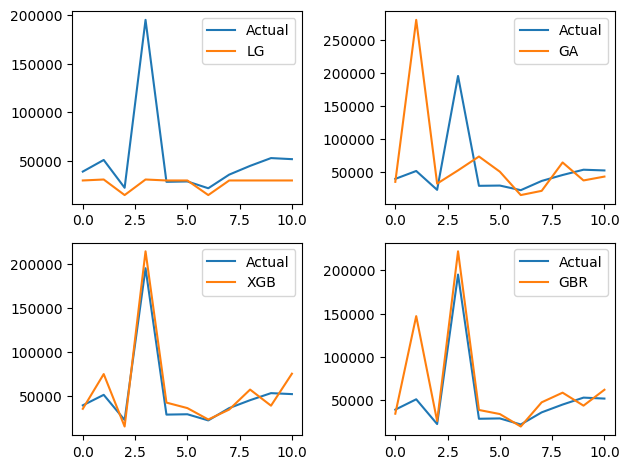

In [51]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['LG'].iloc[0:11], label = 'LG')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['GA'].iloc[0:11], label = 'GA')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['XGB'].iloc[0:11], label = 'XGB')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['GBR'].iloc[0:11], label = 'GBR')

plt.tight_layout()

plt.legend()

## Evaluating the Algorithm

In [52]:
score1 = r2_score(y_test, y_pred1)
score2 = r2_score(y_test, y_pred2)
score3 = r2_score(y_test, y_pred3)
score4 = r2_score(y_test, y_pred4)

print('R2_score on model1 is {:,}'.format(score1))
print('R2_score on model2 is {:,}'.format(score2))
print('R2_score on model3 is {:,}'.format(score3))
print('R2_score on model4 is {:,}'.format(score4))

R2_score on model1 is 0.9720696341124406
R2_score on model2 is 0.9717825820391255
R2_score on model3 is -0.05327660246430743
R2_score on model4 is -0.04542248361596202


In [59]:
point1 = mean_squared_error(y_test, y_pred1)
point2 = mean_squared_error(y_test, y_pred2)
point3 = mean_squared_error(y_test, y_pred3)
point4 = mean_squared_error(y_test, y_pred4)

print('Mean squared error on model1 is ${:,}'.format(point1))
print('Mean squared error on model2 is ${:,}'.format(point2))
print('Mean squared error on model3 is ${:,}'.format(point3))
print('Mean squared error on model4 is ${:,}'.format(point4))


Mean squared error on model1 is $148,300,255.8303935
Mean squared error on model2 is $149,824,399.69877884
Mean squared error on model3 is $5,592,522,140.041107
Mean squared error on model4 is $5,550,819,577.345688


In [60]:

sc1 = mean_absolute_percentage_error(y_test, y_pred1)
sc2 = mean_absolute_percentage_error(y_test, y_pred2)
sc3 = mean_absolute_percentage_error(y_test, y_pred3)
sc4 = mean_absolute_percentage_error(y_test, y_pred4)

print('Mean absolute percentage error on model1 is {:,}'.format(sc1))
print('Mean absolute percentage error on model2 is {:,}'.format(sc2))
print('Mean absolute percentage error on model3 is {:,}'.format(sc3))
print('Mean absolute percentage error on model4 is {:,}'.format(sc4))

Mean absolute percentage error on model1 is 0.50658180412497
Mean absolute percentage error on model2 is 0.6299456192261309
Mean absolute percentage error on model3 is 0.41050377570905
Mean absolute percentage error on model4 is 0.4680552055734407


# Saving Model

In [55]:
lg= LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

In [56]:
import pickle

In [57]:
data = {"model": lg, "le_brand": le_brand, "le_fuel_type": le_fuel_type, 
        "le_transmission": le_transmission, "le_accident": le_accident}
with open("Used_car_price_prediction2.pki", "wb") as f:
    pickle.dump(data,f)

## Conclusion

In this notebook, I deployed machine learning models to predict used car prices. 

The model we descide to move with Logistic Regression, which has a Prediction Quality of 9.72, Prediction error of $148,300,255 and Percentage error of 50%. This value could still be reduce by hyperparameter tuning of the models.

This prediction web would help build trust between the customer, leading to 40% increase in new cutomers and 25% increase in company revenue.


